<a href="https://colab.research.google.com/github/ShokhjahonNosirov/Airbnb-dataset/blob/master/My_Airbnb_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Load data
data = pd.read_csv('/content/Airbnb_Open_Data.csv', on_bad_lines='skip', engine='python')
data.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


ideas:
1. anything about countries?
2. anything about neighborhoods?
3. change NAME to name
4. hosts who are identified?
5. lat and long within the country?
6. Clean service fee, price from characters
7. how many room types?
8. see describe and detect outliers
9. any missing values?


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102058 entries, 0 to 102057
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102058 non-null  int64  
 1   NAME                            101808 non-null  object 
 2   host id                         102058 non-null  int64  
 3   host_identity_verified          101769 non-null  object 
 4   host name                       101654 non-null  object 
 5   neighbourhood group             102029 non-null  object 
 6   neighbourhood                   102042 non-null  object 
 7   lat                             102050 non-null  float64
 8   long                            102050 non-null  float64
 9   instant_bookable                101953 non-null  object 
 10  cancellation_policy             101982 non-null  object 
 11  room type                       102058 non-null  object 
 12  Construction yea

In [ ]:
data.rename(columns={"NAME": "name"}, inplace=True)
data.head()

,id,name,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,instant_bookable,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,True,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,True,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [ ]:
data.describe()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,2.853900e+10,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [ ]:
data.duplicated().sum()
#print(data[data.duplicated()])
data.drop_duplicates(keep='first', inplace=True)

In [ ]:
data['neighbourhood group'].unique()

array(['Brooklyn', 'Manhattan', 'brookln', 'manhatan', 'Queens', nan,
       'Staten Island', 'Bronx'], dtype=object)

In [ ]:
data['neighbourhood group'].value_counts()

Manhattan        43557
Brooklyn         41630
Queens           13197
Bronx             2694
Staten Island      949
brookln              1
manhatan             1
Name: neighbourhood group, dtype: int64

In [ ]:
data['country'].unique()
#how many nan's data.isnull().sum()

array(['United States', nan], dtype=object)

In [ ]:
#drop the column
data.drop(columns=['country', 'country code'], inplace=True)

In [ ]:
data['room type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

In [ ]:
data['room type'].value_counts()

Entire home/apt    53429
Private room       46306
Shared room         2208
Hotel room           115
Name: room type, dtype: int64

In [ ]:
data.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            404
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       400
number of reviews                    183
last review                        15832
reviews per month                  15818
review rate number                   319
calculated host listings count       319
availability 365                     448
house_rules                        51842
license                           102056
dtype: int64

In [ ]:
data[data['room type'] == 'Private room'].head()

,id,name,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
6,1004650,BlissArtsSpace!,61300605564,NaN,Alberta,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,$14,45.0,49.0,10/5/2017,0.40,5.0,1.0,224.0,Please no shoes in the house so bring slippers...,NaN
7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,$212,45.0,49.0,10/5/2017,0.40,5.0,1.0,219.0,House Guidelines for our BnB We are delighted ...,NaN
8,1005754,Large Furnished Room Near B'way,79384379533,verified,Evelyn,Manhattan,Hell's Kitchen,40.76489,-73.98493,United States,...,$204,2.0,430.0,6/24/2019,3.47,3.0,1.0,180.0,- Please clean up after yourself when using th...,NaN


In [ ]:
data[data['minimum nights'] > 70][['name', 'minimum nights', 'price']].head()

,name,minimum nights,price
15,West Village Nest - Superhost,90.0,$578
62,NaN,180.0,$779
107,Large 2 Bedroom Great for Groups!,90.0,$500
165,Charming & Cozy midtown loft any WEEK ENDS !!!,81.0,$950
166,* Spacious GARDEN Park Slope Duplex* 6 people max,144.0,$374


In [ ]:
data[(data['minimum nights'] > 70) & (data['neighbourhood group'] == 'Brooklyn')].head()

,id,name,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
107,1060432,Large 2 Bedroom Great for Groups!,94662871331,unconfirmed,Tess,Brooklyn,Bedford-Stuyvesant,40.68373,-73.92377,United States,...,$100,90.0,162.0,6/28/2019,1.46,3.0,2.0,189.0,- Thanks for not smoking and leaving your pets...,NaN
166,1093018,* Spacious GARDEN Park Slope Duplex* 6 people max,61571782497,verified,Nicole,Brooklyn,Gowanus,40.66858,-73.99083,United States,...,$75,144.0,80.0,7/6/2019,NaN,2.0,1.0,52.0,"No candles, smoking or flame of any kind is al...",NaN
169,1094675,House On Henry (2nd FLR Suite),44408473243,NaN,James,Brooklyn,Carroll Gardens,40.67830,-74.00135,United States,...,$168,273.0,150.0,6/18/2019,1.40,5.0,3.0,141.0,-Please no pets -Quiet hours are from 10pm - 8...,NaN
171,1095779,Sunny cozy room in Brklyn townhouse,29877853006,NaN,Jared,Brooklyn,Bushwick,40.70641,-73.91765,United States,...,$101,275.0,47.0,6/19/2019,0.94,5.0,1.0,263.0,No pets that shed; If you have a hypo-allergen...,NaN
181,1101302,"Fort Greene, Brooklyn: Center Bedroom",9549678609,unconfirmed,Adele,Brooklyn,Fort Greene,40.68863,-73.97691,United States,...,$21,350.0,206.0,6/30/2019,1.92,4.0,2.0,96.0,-No shoes in our home. Please leave them at th...,NaN


In [ ]:
data.corr()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
id,1.000000,-0.001189,-0.008600,0.042483,0.000994,0.005305,-0.042115,0.038153,0.036569,0.024062,-0.139318
host id,-0.001189,1.000000,0.000389,-0.008805,0.004726,-0.002359,-0.004800,-0.001980,0.003608,0.001733,-0.002164
lat,-0.008600,0.000389,1.000000,0.074427,0.005489,0.014918,-0.025154,-0.019686,-0.003771,0.032314,-0.005054
long,0.042483,-0.008805,0.074427,1.000000,0.001480,-0.039551,0.069202,0.119059,0.015249,-0.104230,0.058216
Construction year,0.000994,0.004726,0.005489,0.001480,1.000000,-0.000480,0.001897,0.004117,0.005031,-0.002627,-0.008096
minimum nights,0.005305,-0.002359,0.014918,-0.039551,-0.000480,1.000000,-0.049945,-0.095744,-0.002244,0.084489,0.063167
number of reviews,-0.042115,-0.004800,-0.025154,0.069202,0.001897,-0.049945,1.000000,0.590978,-0.018279,-0.080799,0.099578
reviews per month,0.038153,-0.001980,-0.019686,0.119059,0.004117,-0.095744,0.590978,1.000000,0.037751,-0.025403,0.078100
review rate number,0.036569,0.003608,-0.003771,0.015249,0.005031,-0.002244,-0.018279,0.037751,1.000000,0.024303,-0.006038
calculated host listings count,0.024062,0.001733,0.032314,-0.104230,-0.002627,0.084489,-0.080799,-0.025403,0.024303,1.000000,0.159005


In [ ]:
data['availability'] = data['availability 365'] / 365 * 100
data.head()

,id,name,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license,availability
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN,78.356164
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN,62.465753
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN,96.438356
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN,88.219178
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN,79.178082


In [ ]:
data.groupby(['neighbourhood group'])['id'].count()

neighbourhood group
Bronx             2712
Brooklyn         41842
Manhattan        43792
Queens           13267
Staten Island      955
brookln              1
manhatan             1
Name: id, dtype: int64

In [ ]:
data['neighbourhood group'] = data['neighbourhood group'].replace({'brookln': 'Brooklyn'})
data['neighbourhood group'].unique()

array(['Brooklyn', 'Manhattan', 'manhatan', 'Queens', nan,
       'Staten Island', 'Bronx'], dtype=object)

In [ ]:
data['service fee'] = data["service fee"].str.replace("$","")
data['service fee'] = data['service fee'].astype('Int64')

/var/folders/7y/8fg422v56mb46v3xsy0qcnxh0000gn/T/ipykernel_48146/781234561.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['service fee'] = data["service fee"].str.replace("$","")


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102058 entries, 0 to 102057
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102058 non-null  int64  
 1   name                            101808 non-null  object 
 2   host id                         102058 non-null  int64  
 3   host_identity_verified          101769 non-null  object 
 4   host name                       101654 non-null  object 
 5   neighbourhood group             102029 non-null  object 
 6   neighbourhood                   102042 non-null  object 
 7   lat                             102050 non-null  float64
 8   long                            102050 non-null  float64
 9   instant_bookable                101953 non-null  object 
 10  cancellation_policy             101982 non-null  object 
 11  room type                       102058 non-null  object 
 12  Construction yea

In [ ]:
# Name change

import pandas as pd

data.rename(columns={'NAME': 'title'}, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   title                           102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [ ]:
data.drop(columns=['title', 'house_rules'], inplace=True)

In [ ]:
print(data["room type"])

0            Private room
1         Entire home/apt
2            Private room
3         Entire home/apt
4         Entire home/apt
               ...       
102594       Private room
102595       Private room
102596       Private room
102597    Entire home/apt
102598    Entire home/apt
Name: room type, Length: 102599, dtype: object


In [ ]:
data.drop(columns=['license'], inplace=True)

In [ ]:
print(data.groupby(["neighbourhood"])["id"].count())

neighbourhood
Allerton             97
Arden Heights         9
Arrochar             52
Arverne             223
Astoria            1876
                   ... 
Windsor Terrace     331
Woodhaven           192
Woodlawn             29
Woodrow               3
Woodside            588
Name: id, Length: 224, dtype: int64


In [ ]:
print(data.groupby(["neighbourhood group"])["id"].count())

neighbourhood group
Bronx             2712
Brooklyn         41842
Manhattan        43792
Queens           13267
Staten Island      955
brookln              1
manhatan             1
Name: id, dtype: int64


In [ ]:
print(data.groupby(["number of reviews"])["id"].count())

number of reviews
0.0       15734
1.0       10408
2.0        7175
3.0        5375
4.0        4151
          ...  
849.0         1
884.0         1
966.0         1
1010.0        1
1024.0        1
Name: id, Length: 476, dtype: int64


In [ ]:
data['neighbourhood group'] = data['neighbourhood group'].replace({'brookln': 'Brooklyn'})
data['neighbourhood group'].unique()

array(['Brooklyn', 'Manhattan', 'manhatan', 'Queens', nan,
       'Staten Island', 'Bronx'], dtype=object)

In [ ]:
data['neighbourhood group'] = data['neighbourhood group'].replace({'manhatan': 'Manhattan'})
data['neighbourhood group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', nan, 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
filtered_outliers = data.loc[
    (data['minimum nights'] > 0) &
    (data['minimum nights'] < data['minimum nights'].median()) &
    (data['availability 365'] > 1) &
    (data['availability 365'] < 365)
]


print(filtered_outliers)

             id                                              NAME  \
8       1005754                   Large Furnished Room Near B'way   
12      1007964                   Central Manhattan/near Broadway   
14      1009068  Wonderful Guest Bedroom in Manhattan for SINGLES   
16      1010173                  Only 2 stops to Manhattan studio   
17      1010725                 Perfect for Your Parents + Garden   
...         ...                                               ...   
102590  6090228               Wonderful artists' loft in Brooklyn   
102592  6091333               3BR/1 Ba in TriBeCa w/ outdoor deck   
102593  6091885               Welcoming, Clean, Cheap on St Marks   
102594  6092437                        Spare room in Williamsburg   
102598  6094647                              585 sf Luxury Studio   

            host id host_identity_verified host name neighbourhood group  \
8       79384379533               verified    Evelyn           Manhattan   
12      88136055909

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

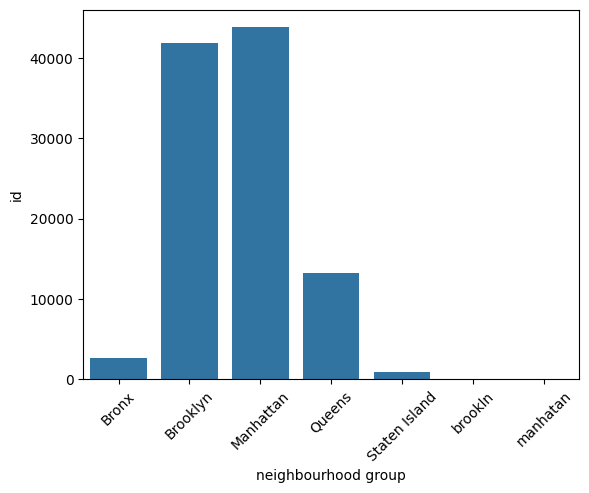

In [ ]:
temp = data.groupby(['neighbourhood group']).count().reset_index()
sns.barplot(x='neighbourhood group', y='id', data=temp)
plt.xticks(rotation=45)  # Rotate x labels if needed
plt.show()


# temp = data.groupby(['neighbourhood group']).count().reset.index()
# sns.barplot(x='neighbourhood group', y='id', data=data)